# FIFA 19 EXPLORATORY DATA ANALYSIS
### - By Gokul Hari Nair

This is an attempt to analyse the dataset of one of my favorite games of all time, FIFA 19. I believe this analysis can be pretty easily understood by both beginners as well as the experienced alike. 

Your feedback will be much appreciated, as it would help me make a better analysis of various other datasets in the future. 

Thank You!

![SR2jhDspYklDvlnDOlTz9ABJESuc6r2VBGWmuQPdS5g_390x400_1x-0.jpeg](http://cdn-products.eneba.com/resized-products/SR2jhDspYklDvlnDOlTz9ABJESuc6r2VBGWmuQPdS5g_390x400_1x-0.jpeg)                              

## *STEPS TAKEN FOR THE ANALYSIS*:-

### 1.IMPORTING PACKAGES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### 2.IMPORTING FIFA 19 DATASET

In [2]:
#importing data set
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa19/data.csv


### 3. TOP 10 ROWS OF THE DATASET

In [3]:
fifa_dataset = pd.read_csv('/kaggle/input/fifa19/data.csv')
fifa_dataset.drop('Unnamed: 0', axis =1, inplace=True)
fifa_dataset.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


### 4. CHECKING FOR NULL VALUES

In [4]:
#checking for null values
fifa_dataset.isnull().any()

ID                False
Name              False
Age               False
Photo             False
Nationality       False
                  ...  
GKHandling         True
GKKicking          True
GKPositioning      True
GKReflexes         True
Release Clause     True
Length: 88, dtype: bool

### 5. FILLING IN MISSING VALUES

In [5]:
fifa_dataset['ShortPassing'].fillna(fifa_dataset['ShortPassing'].mean(), inplace = True)
fifa_dataset['Volleys'].fillna(fifa_dataset['Volleys'].mean(), inplace = True)
fifa_dataset['Dribbling'].fillna(fifa_dataset['Dribbling'].mean(), inplace = True)
fifa_dataset['Curve'].fillna(fifa_dataset['Curve'].mean(), inplace = True)
fifa_dataset['FKAccuracy'].fillna(fifa_dataset['FKAccuracy'], inplace = True)
fifa_dataset['LongPassing'].fillna(fifa_dataset['LongPassing'].mean(), inplace = True)
fifa_dataset['BallControl'].fillna(fifa_dataset['BallControl'].mean(), inplace = True)
fifa_dataset['HeadingAccuracy'].fillna(fifa_dataset['HeadingAccuracy'].mean(), inplace = True)
fifa_dataset['Finishing'].fillna(fifa_dataset['Finishing'].mean(), inplace = True)
fifa_dataset['Crossing'].fillna(fifa_dataset['Crossing'].mean(), inplace = True)
fifa_dataset['Weight'].fillna('200lbs', inplace = True)
fifa_dataset['Contract Valid Until'].fillna(2019, inplace = True)
fifa_dataset['Height'].fillna("5'11", inplace = True)
fifa_dataset['Loaned From'].fillna('None', inplace = True)
fifa_dataset['Joined'].fillna('Jul 1, 2018', inplace = True)
fifa_dataset['Jersey Number'].fillna(8, inplace = True)
fifa_dataset['Body Type'].fillna('Normal', inplace = True)
fifa_dataset['Position'].fillna('ST', inplace = True)
fifa_dataset['Club'].fillna('No Club', inplace = True)
fifa_dataset['Work Rate'].fillna('Medium/ Medium', inplace = True)
fifa_dataset['Skill Moves'].fillna(fifa_dataset['Skill Moves'].median(), inplace = True)
fifa_dataset['Weak Foot'].fillna(3, inplace = True)
fifa_dataset['Preferred Foot'].fillna('Right', inplace = True)
fifa_dataset['International Reputation'].fillna(1, inplace = True)
fifa_dataset['Wage'].fillna('€300K', inplace = True)

### 6. RETRIEVING ALL PLAYER POSITIONS 

In [6]:
#position of players on field
fifa_dataset['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

### 7. TOP 10 COUNTRIES BY PLAYER COUNT

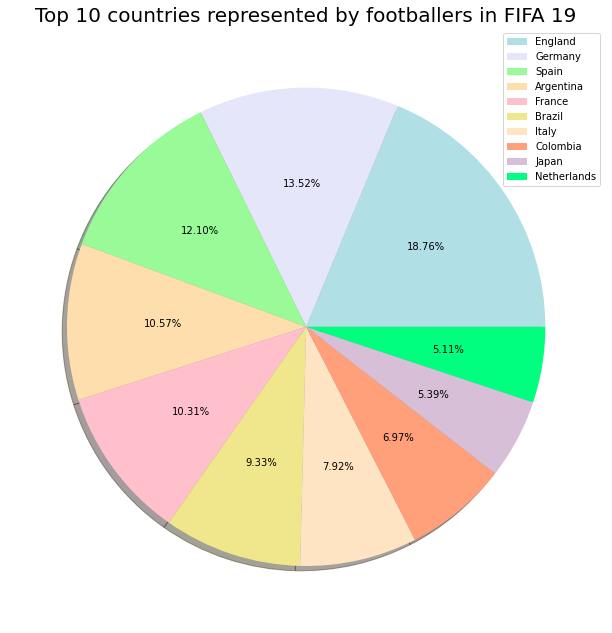

In [7]:
#top 10 countries producing players in FIFA-19
data = fifa_dataset.groupby('Nationality')['ID'].count().sort_values(ascending = False).reset_index().head(10)
countries = data['Nationality']
players = data['ID']
plt.figure(figsize =(11, 11))
colors=['powderblue', 'lavender', 'palegreen', 'navajowhite', 'pink', 'khaki', 'bisque', 'lightsalmon', 'thistle', 'springgreen']
plt.pie(players, colors = colors, autopct = '%.2f%%', shadow = True)
plt.legend(labels = countries)
plt.title('Top 10 countries represented by footballers in FIFA 19',fontsize = 20)
plt.show()

### 8. RETREIVING COLUMN DETAILS (AS ALL THE COLUMNS COULD NOT BE VIEWED)

In [8]:
#as all column names ain't visible, just printing them out
for col in fifa_dataset.columns:
    print(col)

ID
Name
Age
Photo
Nationality
Flag
Overall
Potential
Club
Club Logo
Value
Wage
Special
Preferred Foot
International Reputation
Weak Foot
Skill Moves
Work Rate
Body Type
Real Face
Position
Jersey Number
Joined
Loaned From
Contract Valid Until
Height
Weight
LS
ST
RS
LW
LF
CF
RF
RW
LAM
CAM
RAM
LM
LCM
CM
RCM
RM
LWB
LDM
CDM
RDM
RWB
LB
LCB
CB
RCB
RB
Crossing
Finishing
HeadingAccuracy
ShortPassing
Volleys
Dribbling
Curve
FKAccuracy
LongPassing
BallControl
Acceleration
SprintSpeed
Agility
Reactions
Balance
ShotPower
Jumping
Stamina
Strength
LongShots
Aggression
Interceptions
Positioning
Vision
Penalties
Composure
Marking
StandingTackle
SlidingTackle
GKDiving
GKHandling
GKKicking
GKPositioning
GKReflexes
Release Clause


### 9. TOP 5 FOOTBALLERS WITH 5-STAR SKILL RATING

In [9]:
_5star_skills = fifa_dataset[fifa_dataset['Skill Moves']==5.0][['Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value']].head(5).reset_index()
_5star_skills = _5star_skills.drop('index', axis =1)
_5star_skills

,Name,Age,Nationality,Overall,Club,Value
0,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M
1,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M
2,K. Mbappé,19,France,88,Paris Saint-Germain,€81M
3,Coutinho,26,Brazil,88,FC Barcelona,€69.5M
4,Marcelo,30,Brazil,88,Real Madrid,€43M


### 10. PLAYER COUNT BY POSITION

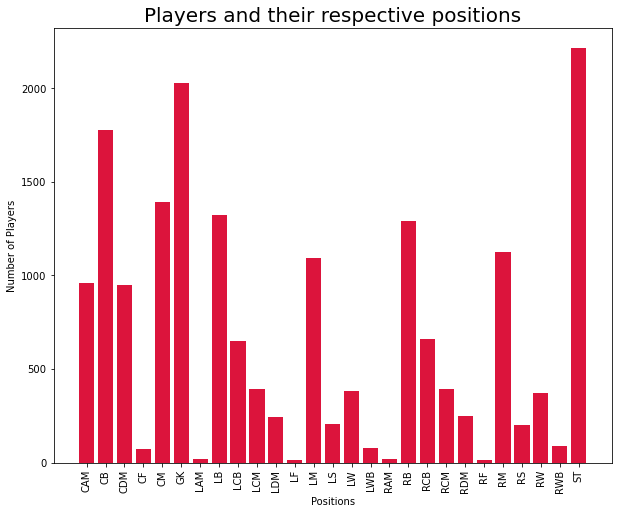

In [10]:
respective_positions = fifa_dataset.groupby('Position')['ID'].count().reset_index()
no_of_players = respective_positions['ID']
positions = respective_positions['Position']
plt.figure(figsize = (10,8))
plt.bar(positions , no_of_players, color = 'crimson')
plt.xticks(rotation = 90)
plt.title('Players and their respective positions', fontsize = 20)
plt.xlabel('Positions')
plt.ylabel('Number of Players')
plt.show()

### 10. PLAYERS AND THEIR PREFERRED FOOT

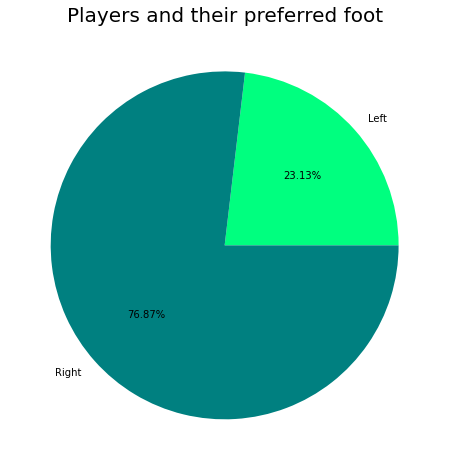

In [11]:
#players and their preferred foot
preferred_foot = fifa_dataset.groupby('Preferred Foot')['ID'].count().reset_index()
plt.figure( figsize = (9, 8))
plt.pie(preferred_foot['ID'], labels= preferred_foot['Preferred Foot'], colors =['springgreen', 'teal'], autopct = '%.2f%%')
plt.title('Players and their preferred foot', fontsize = 20)
plt.show()

### 11. CLEANING MARKET VALUE COLUMN

In [12]:
fifa_dataset['Value'] = fifa_dataset['Value'].str.replace('€','')
values= []
for i in fifa_dataset['Value']:
    if 'M' in i:
        i = i.replace('M', '')
        i = float(i)*1000000
    elif 'K' in i:
        i = i.replace('K', '')
        i = float(i)*1000
    values.append(float(i))
fifa_dataset['Value'] =values

### 12. MOST VALUABLE PLAYERS OF THE GAME

In [13]:
most_valuable = fifa_dataset.sort_values('Value', ascending= False)[['Name', 'Age', 'Club', 'Nationality', 'Value']].head(10).reset_index()
most_valuable = most_valuable.drop('index', axis = 1)
most_valuable

,Name,Age,Club,Nationality,Value
0,Neymar Jr,26,Paris Saint-Germain,Brazil,118500000.0
1,L. Messi,31,FC Barcelona,Argentina,110500000.0
2,K. De Bruyne,27,Manchester City,Belgium,102000000.0
3,E. Hazard,27,Chelsea,Belgium,93000000.0
4,P. Dybala,24,Juventus,Argentina,89000000.0
5,H. Kane,24,Tottenham Hotspur,England,83500000.0
6,K. Mbappé,19,Paris Saint-Germain,France,81000000.0
7,L. Suárez,31,FC Barcelona,Uruguay,80000000.0
8,A. Griezmann,27,Atlético Madrid,France,78000000.0
9,R. Lewandowski,29,FC Bayern München,Poland,77000000.0


### 13. TOP 10 OLDEST PLAYERS ON FIFA 19

In [14]:
oldest_players = fifa_dataset.sort_values('Age', ascending= False)[['Name', 'Age', 'Club', 'Nationality', 'Position']].head(10).reset_index()
oldest_players = oldest_players.drop('index', axis = 1)
oldest_players

,Name,Age,Club,Nationality,Position
0,O. Pérez,45,Pachuca,Mexico,GK
1,K. Pilkington,44,Cambridge United,England,GK
2,T. Warner,44,Accrington Stanley,Trinidad & Tobago,GK
3,S. Narazaki,42,Nagoya Grampus,Japan,GK
4,C. Muñoz,41,CD Universidad de Concepción,Argentina,GK
5,J. Villar,41,No Club,Paraguay,GK
6,H. Sulaimani,41,Ohod Club,Saudi Arabia,LB
7,M. Tyler,41,Peterborough United,England,GK
8,B. Nivet,41,ESTAC Troyes,France,CAM
9,F. Kippe,40,Lillestrøm SK,Norway,LCB


### 14. TOP 10 CLUBS BY OVERALL STATS OF PLAYERS

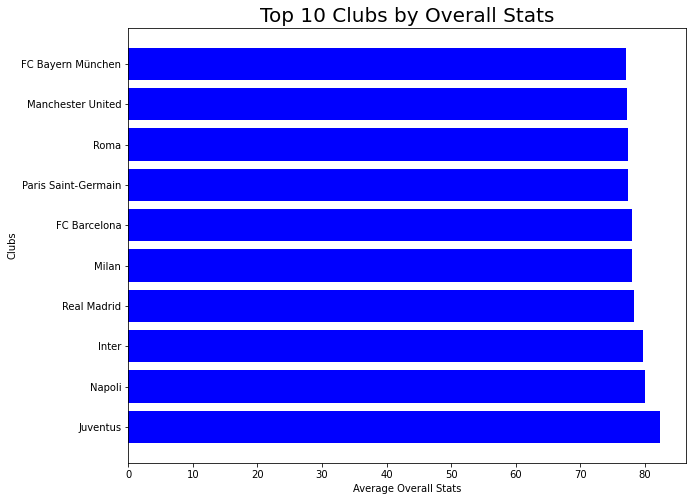

In [15]:
data = fifa_dataset.groupby('Club')['Overall'].mean().reset_index().sort_values('Overall', ascending = False).head(10).reset_index()
data = data.drop('index', axis = 1)
plt.figure(figsize = (10,8))
plt.barh(data['Club'], data['Overall'], color = 'blue')
plt.title('Top 10 Clubs by Overall Stats', fontsize = 20)
plt.xlabel('Average Overall Stats')
plt.ylabel('Clubs')
plt.show()

### 15. 10 MOST VALUABLE CLUBS 

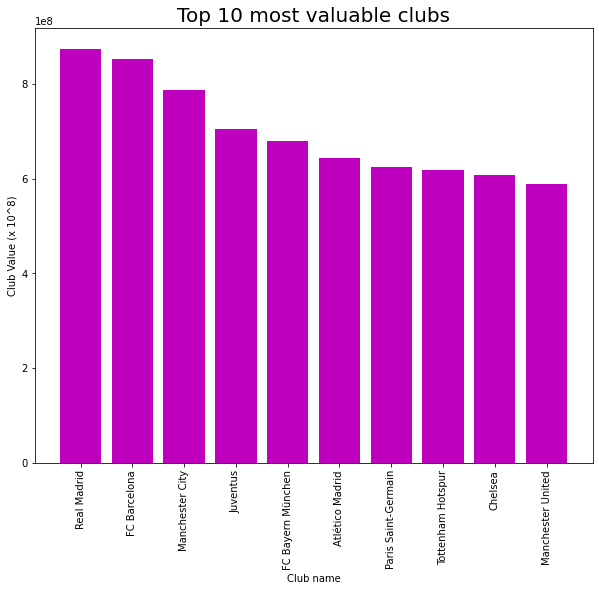

In [16]:
club_value = fifa_dataset.groupby('Club')['Value'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (10,8))
plt.bar('Club', 'Value', data = club_value, color = 'm')
plt.xticks(rotation = 90)
plt.title('Top 10 most valuable clubs',fontsize = 20)
plt.xlabel('Club name')
plt.ylabel('Club Value (x 10^8)')
plt.show()

### 16. CLEANING WAGE COLUMN 

In [17]:
fifa_dataset['Wage'] = fifa_dataset['Wage'].str.replace('€','')
wages= []
for i in fifa_dataset['Wage']:
    i = i.replace('K', '')
    i = float(i)*1000
    wages.append(float(i))
fifa_dataset['Wage'] = wages

### 17. DISTRIBUTION OF WAGE BY AGE CATEGORY

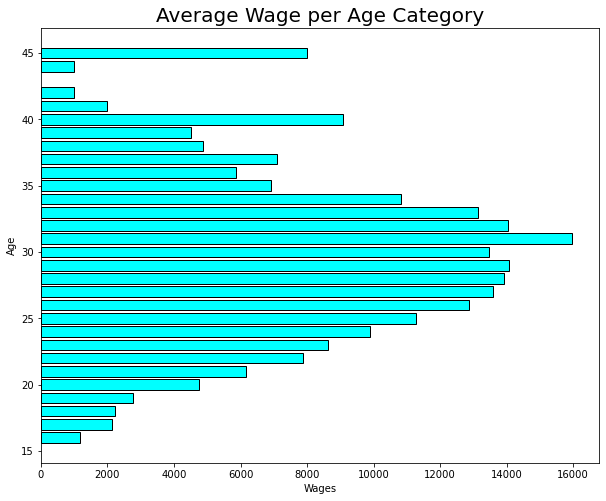

In [18]:
#average wage per age category
age_wage = fifa_dataset.groupby('Age')['Wage'].mean().reset_index()
age = age_wage['Age']
value= age_wage['Wage']
plt.figure(figsize = (10,8))
plt.barh(age, value, color = 'cyan', edgecolor = 'black')
plt.title('Average Wage per Age Category', fontsize = 20)
plt.xlabel('Wages')
plt.ylabel('Age')
plt.show()

### 18. DISTRIBUTION OF OVERALL AND POTENTIAL PLAYER RATINGS BY AGE

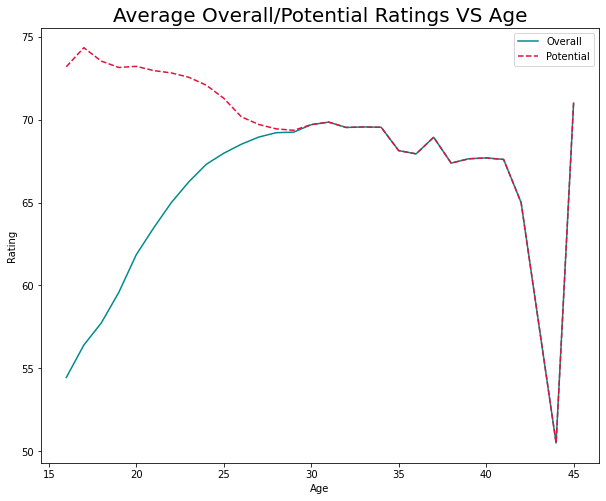

In [19]:
age_overall  = fifa_dataset.groupby('Age')['Overall'].mean().reset_index().sort_values('Age')
age_potential  = fifa_dataset.groupby('Age')['Potential'].mean().reset_index().sort_values('Age')
plt.figure(figsize = (10,8))
plt.plot('Age', 'Overall', data = age_overall, color = 'darkcyan')
plt.plot('Age', 'Potential', linestyle = 'dashed', data = age_potential, color = 'crimson')
plt.title('Average Overall/Potential Ratings VS Age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Rating')
plt.legend()
plt.show()

### 19. PLAYER COUNT BY WORK RATE CATEGORIES

        Work Rate    ID
0      High/ High  1015
1       High/ Low   699
2    High/ Medium  3173
3       Low/ High   439
4        Low/ Low    34
5     Low/ Medium   449
6    Medium/ High  1690
7     Medium/ Low   850
8  Medium/ Medium  9858


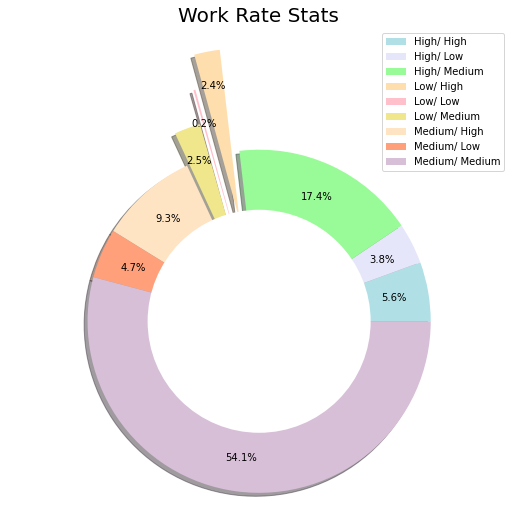

In [20]:
data = fifa_dataset.groupby('Work Rate')['ID'].count().reset_index()
print(data)
work_rate = data['Work Rate']
players = data['ID']
plt.figure(figsize = (9,9))
plt.pie(players, autopct = '%.1f%%', colors = colors,shadow = True, explode = (0,0,0,0.6,0.4,0.2,0,0,0), pctdistance = 0.8 )
circle = plt.Circle((0,0), 0.65, fc = 'white')
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.title('Work Rate Stats',fontsize = 20)
plt.legend(labels = work_rate)
plt.show()

### 20. ANALYSIS OF TOP 20 CLUBS BY DISTRIBUTION OF PLAYER WAGE 

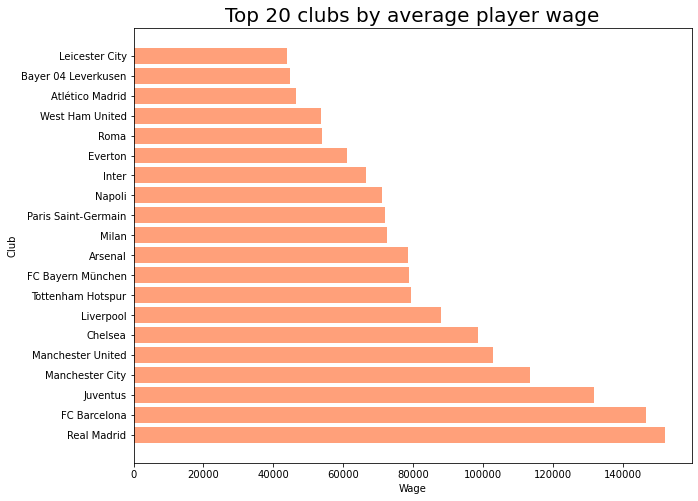

In [21]:
#top 20 most wage paying clubs in the world
data = fifa_dataset.groupby('Club')['Wage'].mean().reset_index().sort_values('Wage', ascending = False).head(20)
plt.figure(figsize = (10,8))
plt.barh(data['Club'], data['Wage'], color = 'lightsalmon')
plt.title('Top 20 clubs by average player wage',fontsize = 20)
plt.xlabel('Wage')
plt.ylabel('Club')
plt.show()

### 21. TOP 10 PENALTY TAKERS 

In [22]:
penalties = fifa_dataset[['Name', 'Club', 'Overall', 'Penalties']].sort_values('Penalties',ascending = False).head(10).reset_index()
penalties = penalties.drop('index', axis =1)
penalties
#Top 10 penalty takers of the game

,Name,Club,Overall,Penalties
0,M. Balotelli,OGC Nice,83,92.0
1,Fabinho,Liverpool,84,91.0
2,H. Kane,Tottenham Hotspur,89,90.0
3,M. Kruse,SV Werder Bremen,82,90.0
4,L. Baines,Everton,77,90.0
5,R. Boudebouz,Real Betis,80,90.0
6,D. Perotti,Roma,81,90.0
7,R. Jiménez,Wolverhampton Wanderers,78,90.0
8,Z. Ibrahimović,LA Galaxy,85,89.0
9,M. Reus,Borussia Dortmund,86,89.0


### 22. TOP 10 FINISHERS OF FIFA 19

In [23]:
finishing = fifa_dataset[['Name', 'Club', 'Finishing']].sort_values('Finishing', ascending = False).head(10).reset_index()
finishing = finishing.drop('index', axis =1)
finishing
#top 10 finishers of the game

,Name,Club,Finishing
0,L. Messi,FC Barcelona,95.0
1,H. Kane,Tottenham Hotspur,94.0
2,Cristiano Ronaldo,Juventus,94.0
3,L. Suárez,FC Barcelona,93.0
4,S. Agüero,Manchester City,93.0
5,G. Higuaín,Milan,92.0
6,R. Lewandowski,FC Bayern München,91.0
7,M. Icardi,Inter,91.0
8,M. Salah,Liverpool,90.0
9,A. Griezmann,Atlético Madrid,90.0


### 23. TOP 10 FREE KICK TAKERS

In [24]:
freekicks = fifa_dataset[['Name', 'Club', 'FKAccuracy']].sort_values('FKAccuracy', ascending = False).head(10).reset_index()
freekicks = freekicks.drop('index', axis =1)
freekicks
#top 10 free kick takers

,Name,Club,FKAccuracy
0,L. Messi,FC Barcelona,94.0
1,S. Giovinco,Toronto FC,93.0
2,M. Pjanić,Juventus,92.0
3,E. Bardhi,Levante UD,91.0
4,H. Çalhanoğlu,Milan,90.0
5,Parejo,Valencia CF,90.0
6,M. Depay,Olympique Lyonnais,88.0
7,P. Dybala,Juventus,88.0
8,S. Nakamura,Júbilo Iwata,88.0
9,R. Malinovskyi,KRC Genk,87.0


### 24. TOP 10 FASTEST PLAYERS

In [25]:
sprint_speed = fifa_dataset[['Name', 'Club', 'SprintSpeed']].sort_values('SprintSpeed', ascending = False).head(10).reset_index()
sprint_speed = sprint_speed.drop('index', axis = 1)
sprint_speed

,Name,Club,SprintSpeed
0,Adama,Wolverhampton Wanderers,96.0
1,L. Sané,Manchester City,96.0
2,K. Mbappé,Paris Saint-Germain,96.0
3,I. Bebou,Hannover 96,95.0
4,G. Bale,Real Madrid,95.0
5,J. Damm,Tigres U.A.N.L.,95.0
6,P. Aubameyang,Arsenal,95.0
7,Maicon,Livorno,95.0
8,E. Knudtzon,Lillestrøm SK,94.0
9,O. Burke,West Bromwich Albion,94.0


### 25. TOP 10 PLAYERS WITH MOST POTENTIAL

In [26]:
most_potential = fifa_dataset[['Name', 'Club', 'Age', 'Position', 'Potential']].sort_values('Potential', ascending = False).head(10).reset_index()
most_potential = most_potential.drop('index', axis = 1)
most_potential

,Name,Club,Age,Position,Potential
0,K. Mbappé,Paris Saint-Germain,19,RM,95
1,L. Messi,FC Barcelona,31,RF,94
2,P. Dybala,Juventus,24,LF,94
3,Cristiano Ronaldo,Juventus,33,ST,94
4,Neymar Jr,Paris Saint-Germain,26,LW,93
5,De Gea,Manchester United,27,GK,93
6,J. Oblak,Atlético Madrid,25,GK,93
7,G. Donnarumma,Milan,19,GK,93
8,Vinícius Júnior,Real Madrid,17,LW,92
9,O. Dembélé,FC Barcelona,21,RW,92


### 26. DISTRIBUTION OF PLAYER AGE AMONG TOP FOOTBALL CLUBS

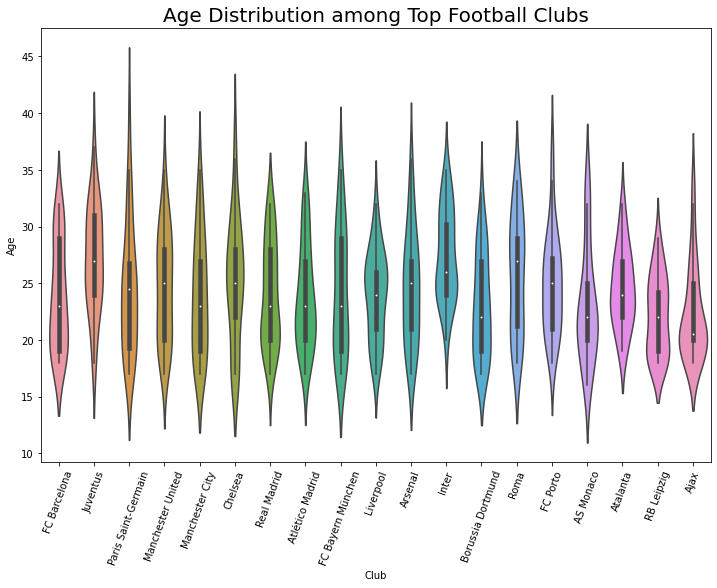

In [27]:
clubs = ('Borussia Dortmund', 'FC Barcelona', 'Real Madrid', 'Juventus', 'Paris Saint-Germain', 'Arsenal', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Roma', 'Atlético Madrid', 'FC Bayern München', 'RB Leipzig', 'Ajax', 'FC Porto', 'AS Monaco', 'Inter', 'Atalanta')
club_age = fifa_dataset[fifa_dataset['Club'].isin(clubs)][['Club', 'Age']].reset_index()
club_pl_age = club_age.drop('index', axis = 1)
plt.figure(figsize = (12, 8))
sns.violinplot(x = 'Club', y = 'Age' , data = club_pl_age)
plt.xticks(rotation = 70)
plt.title('Age Distribution among Top Football Clubs', fontsize = 20)
plt.show()

### 27. DISTRIBUTION OF PLAYER AGE BY TOP FOOTBALL PLAYING NATIONS

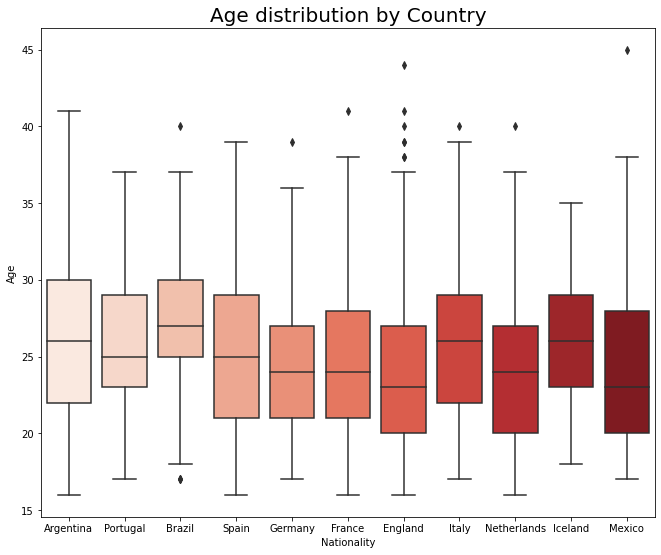

In [28]:
country_ages= fifa_dataset[['Nationality','Age']]
countries = ['Argentina', 'Brazil', 'Portugal', 'Netherlands', 'Spain', 'Italy', 'Germany', 'England', 'France', 'Mexico', 'Iceland']
country_ages = country_ages[country_ages['Nationality'].isin(countries)]
plt.figure( figsize = (11,9))
sns.boxplot('Nationality', 'Age', data = country_ages, palette = 'Reds')
plt.title('Age distribution by Country', fontsize = 20)
plt.show()

### 28. DISTRIBUTION OF AGE BY WORK RATE

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

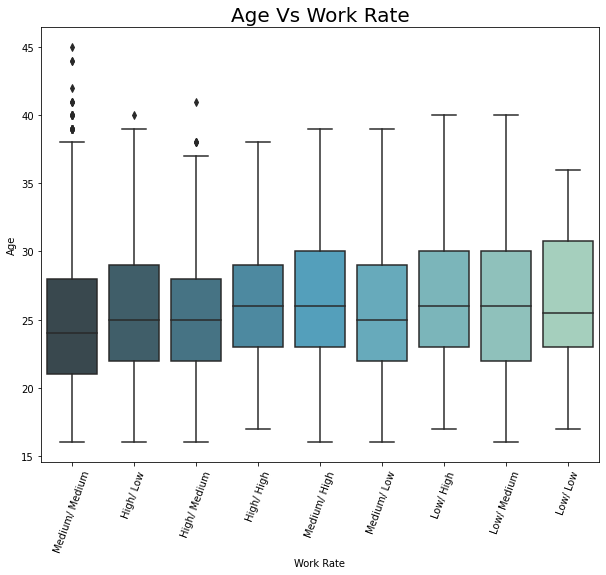

In [29]:
plt.figure(figsize = (10,8))
sns.boxplot('Work Rate', 'Age', data = fifa_dataset, palette = 'GnBu_d')
plt.title('Age Vs Work Rate', fontsize = 20)
plt.xticks(rotation = 70)

### 29. TOP 10 STRIKERS BY OVERALL RATING

In [30]:
strikers = fifa_dataset[fifa_dataset['Position'] == 'ST'][['Name', 'Club', 'Age', 'Value', 'Overall']].sort_values('Overall', ascending = False).head(10).reset_index()
strikers = strikers.drop('index', axis = 1)
strikers

,Name,Club,Age,Value,Overall
0,Cristiano Ronaldo,Juventus,33,77000000.0,94
1,R. Lewandowski,FC Bayern München,29,77000000.0,90
2,H. Kane,Tottenham Hotspur,24,83500000.0,89
3,S. Agüero,Manchester City,30,64500000.0,89
4,G. Bale,Real Madrid,28,60000000.0,88
5,M. Icardi,Inter,25,64500000.0,87
6,R. Lukaku,Manchester United,25,62500000.0,87
7,C. Immobile,Lazio,28,52000000.0,87
8,K. Benzema,Real Madrid,30,37000000.0,85
9,A. Lacazette,Arsenal,27,45000000.0,85


### 30. TOP 10 CENTRE BACKS BY VALUE

In [31]:
centrebacks = fifa_dataset[fifa_dataset['Position'] == 'CB'][['Name', 'Club', 'Age', 'Value', 'Overall']].sort_values('Value', ascending = False).head(10).reset_index()
centrebacks = centrebacks.drop('index', axis = 1)
centrebacks
#top 10 centre backs by value

,Name,Club,Age,Value,Overall
0,S. Umtiti,FC Barcelona,24,57000000.0,87
1,D. Godín,Atlético Madrid,32,44000000.0,90
2,N. Süle,FC Bayern München,22,36500000.0,84
3,S. de Vrij,Inter,26,31500000.0,84
4,M. Benatia,Juventus,31,30000000.0,86
5,J. Tah,Bayer 04 Leverkusen,22,29500000.0,83
6,N. Otamendi,Manchester City,30,28500000.0,85
7,S. Savić,Atlético Madrid,27,26000000.0,83
8,Nacho Fernández,Real Madrid,28,24500000.0,83
9,D. Rugani,Juventus,23,24500000.0,82


### 31. CORRELATION AMONG IMPORTANT PLAYER FEATURES

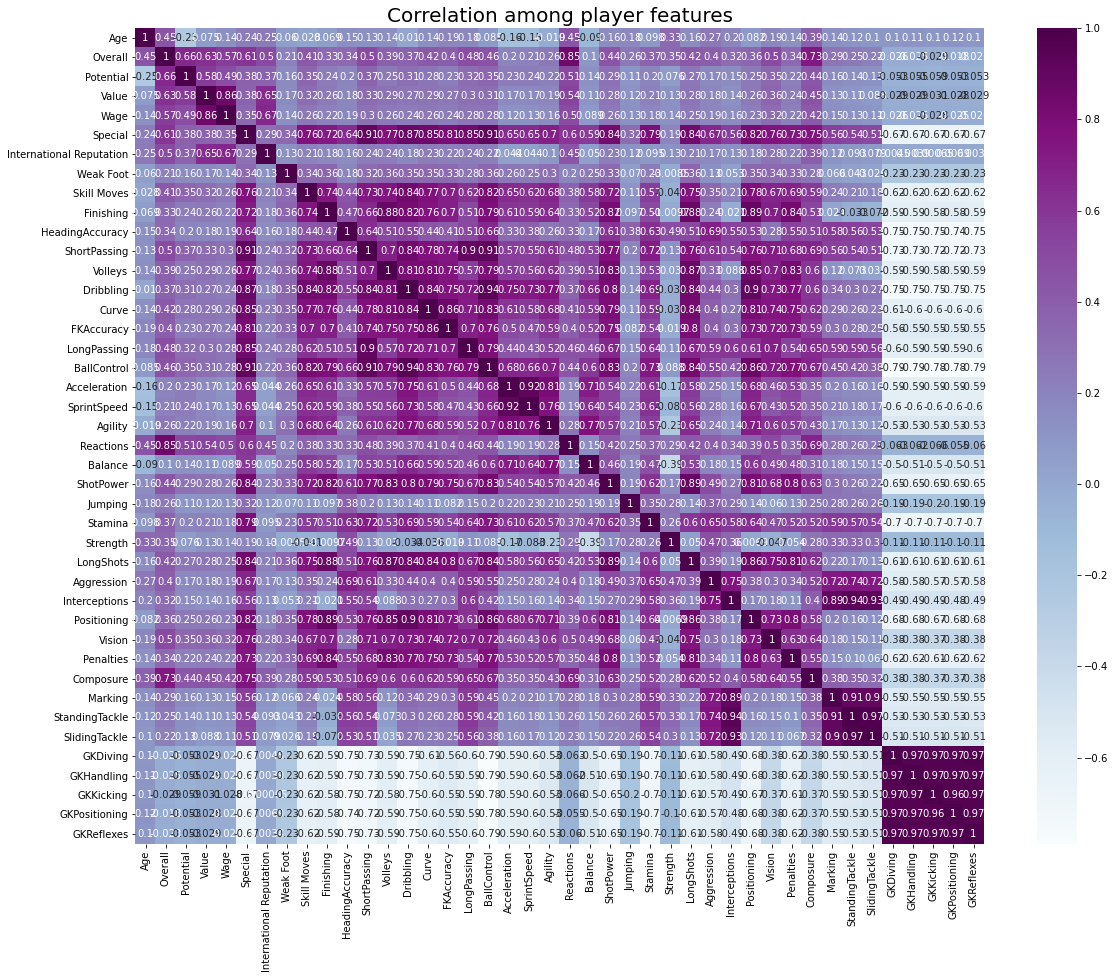

In [32]:
plt.figure( figsize = (19,15))
sns.heatmap(fifa_dataset[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True, cmap = 'BuPu')
plt.title('Correlation among player features',fontsize = 20)
plt.show()

### 32. TOP 10 MOST VALUABLE TEENAGE FOOTBALLERS

In [33]:
teenagers = fifa_dataset[fifa_dataset['Age'] < 20]
teenagers_value = fifa_dataset[fifa_dataset['Age'] < 20][['Name', 'Club', 'Age', 'Position', 'Value']].sort_values('Value', ascending = False).head(10).reset_index()
teenagers_value = teenagers_value.drop('index', axis = 1)
teenagers_value

,Name,Club,Age,Position,Value
0,K. Mbappé,Paris Saint-Germain,19,RM,81000000.0
1,G. Donnarumma,Milan,19,GK,29000000.0
2,M. de Ligt,Ajax,18,RCB,27000000.0
3,K. Havertz,Bayer 04 Leverkusen,19,CAM,22000000.0
4,C. Pulisic,Borussia Dortmund,19,RM,18000000.0
5,Vinícius Júnior,Real Madrid,17,LW,17500000.0
6,J. Sancho,Borussia Dortmund,18,RM,14500000.0
7,A. Lafont,Fiorentina,19,GK,14000000.0
8,T. Alexander-Arnold,Liverpool,19,RB,14000000.0
9,D. Upamecano,RB Leipzig,19,LCB,13000000.0


### 33. MOST VALUABLE CLUBS BY TEEN SQUAD

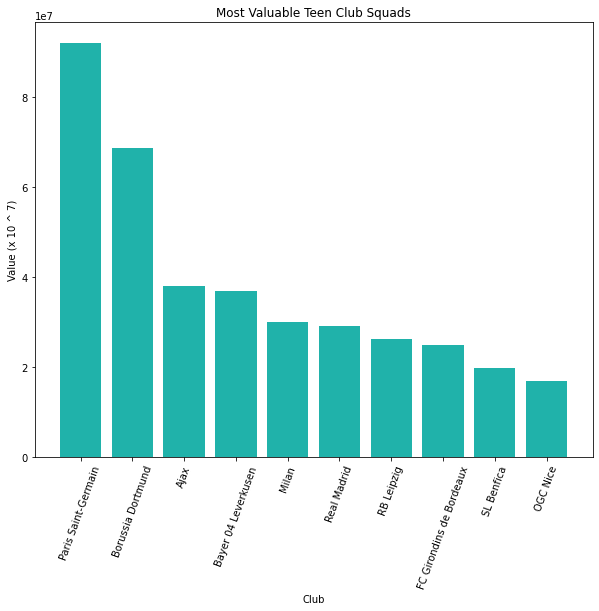

In [34]:
data = teenagers.groupby('Club')['Value'].sum().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize = (10,8))
plt.bar('Club', 'Value', data = data, color = 'lightseagreen')
plt.xticks( rotation  = 70)
plt.title('Most Valuable Teen Club Squads')
plt.xlabel('Club')
plt.ylabel('Value (x 10 ^ 7)')
plt.show()

### 33. OVERALL RATING DISTRIBUTION AMONG TEEN SQUADS OF MAJOR CLUBS

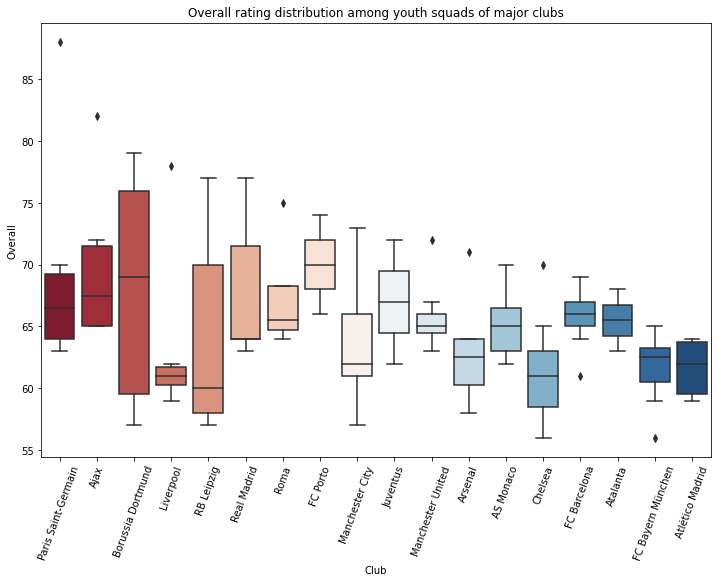

In [35]:
teen_club_overall = teenagers[['Club', 'Overall']]
teen_clubs_req = list(clubs)
plt.figure(figsize = (12,8))
teen_club_overall = teen_club_overall[teen_club_overall['Club'].isin(teen_clubs_req)]
sns.boxplot('Club', 'Overall', data = teen_club_overall , palette = 'RdBu')
plt.xticks( rotation = 70)
plt.title('Overall rating distribution among youth squads of major clubs')
plt.show()

### 34. TOP 10 FASTEST TEEN PLAYERS

In [36]:
teen_speed = teenagers[['Name', 'Age', 'Club', 'Overall', 'Position', 'SprintSpeed']].sort_values('SprintSpeed', ascending = False).head(10).reset_index()
teen_speed = teen_speed.drop('index', axis = 1)
teen_speed

,Name,Age,Club,Overall,Position,SprintSpeed
0,K. Mbappé,19,Paris Saint-Germain,88,RM,96.0
1,Vinícius Júnior,17,Real Madrid,77,LW,94.0
2,A. Davies,17,Vancouver Whitecaps FC,72,RM,93.0
3,T. Klupś,18,Lech Poznań,59,RM,93.0
4,K. Diatta,19,Club Brugge KV,71,RM,92.0
5,J. Lahne,16,IF Brommapojkarna,59,ST,92.0
6,A. Hakimi,19,Borussia Dortmund,78,LB,91.0
7,A. Appiah,17,Nottingham Forest,58,RW,91.0
8,H. Abe,19,Kashima Antlers,66,LM,90.0
9,H. Gong,19,Vitesse,65,RW,90.0


### 35. TOP 10 TEENAGERS WITH MOST POTENTIAL

In [37]:
teen_potential = teenagers[['Name', 'Age', 'Club', 'Potential', 'Position']].sort_values('Potential', ascending = False).head(10).reset_index()
teen_potential = teen_potential.drop('index', axis = 1)
teen_potential

,Name,Age,Club,Potential,Position
0,K. Mbappé,19,Paris Saint-Germain,95,RM
1,G. Donnarumma,19,Milan,93,GK
2,Vinícius Júnior,17,Real Madrid,92,LW
3,M. de Ligt,18,Ajax,91,RCB
4,A. Lafont,19,Fiorentina,90,GK
5,J. Sancho,18,Borussia Dortmund,89,RM
6,S. Tonali,18,Brescia,89,CDM
7,Riqui Puig,18,FC Barcelona,89,CM
8,K. Havertz,19,Bayer 04 Leverkusen,89,CAM
9,T. Alexander-Arnold,19,Liverpool,88,RB


### 36. FC BARCELONA TEAM MATES

In [38]:
barcelona = fifa_dataset[fifa_dataset['Club'] == 'FC Barcelona']
barcelona

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
20,189511,Sergio Busquets,29,https://cdn.sofifa.org/players/4/19/189511.png,Spain,https://cdn.sofifa.org/flags/45.png,89,89,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,€105.6M
32,189242,Coutinho,26,https://cdn.sofifa.org/players/4/19/189242.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,89,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,€147.7M
42,205600,S. Umtiti,24,https://cdn.sofifa.org/players/4/19/205600.png,France,https://cdn.sofifa.org/flags/18.png,87,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,€121.1M
49,189332,Jordi Alba,29,https://cdn.sofifa.org/players/4/19/189332.png,Spain,https://cdn.sofifa.org/flags/45.png,87,87,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,€77.9M
53,168651,I. Rakitić,30,https://cdn.sofifa.org/players/4/19/168651.png,Croatia,https://cdn.sofifa.org/flags/10.png,87,87,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,81.0,72.0,74.0,70.0,14.0,11.0,12.0,5.0,9.0,€95.3M
54,152729,Piqué,31,https://cdn.sofifa.org/players/4/19/152729.png,Spain,https://cdn.sofifa.org/flags/45.png,87,87,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,86.0,91.0,86.0,84.0,10.0,11.0,14.0,15.0,8.0,€69.7M
96,181872,A. Vidal,31,https://cdn.sofifa.org/players/4/19/181872.png,Chile,https://cdn.sofifa.org/flags/55.png,85,85,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,81.0,82.0,87.0,86.0,4.0,2.0,4.0,2.0,4.0,€53.3M


### 37. PLAYER VALUES AT FC BARCELONA

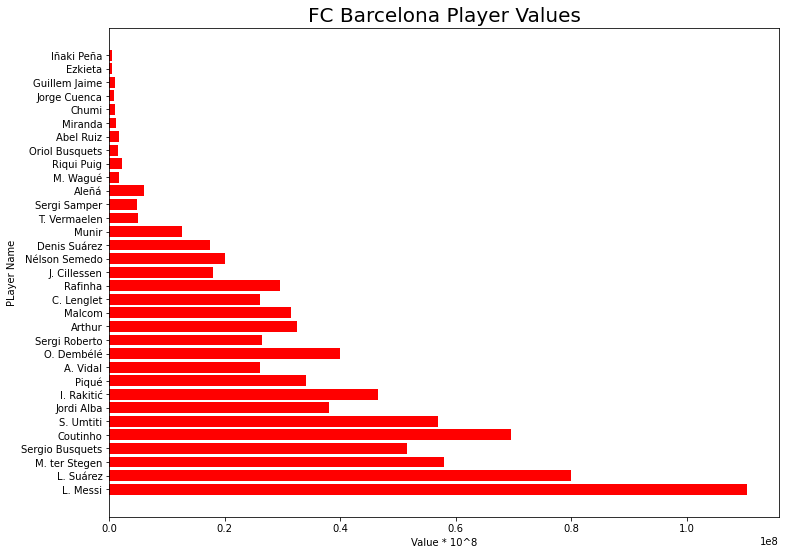

In [39]:
data = barcelona[['Name', 'Value']]
plt.figure(figsize = (12,9))
plt.barh('Name', 'Value', data = data, color = 'r')
plt.title('FC Barcelona Player Values',fontsize = 20)
plt.xlabel('Value * 10^8')
plt.ylabel('PLayer Name')
plt.show()

### 38. TOP COUNTRIES BY PLAYER VALUE

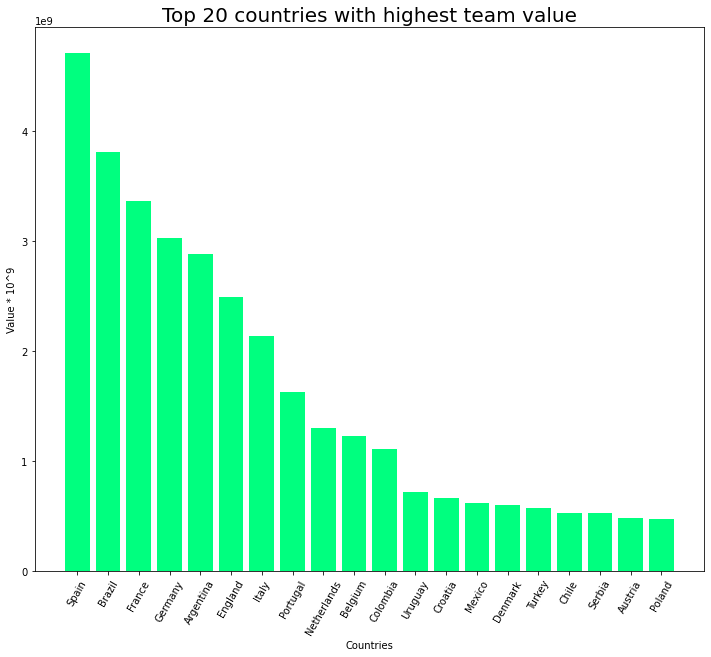

In [40]:
nationality_value = fifa_dataset.groupby('Nationality')['Value'].sum().sort_values(ascending = False).head(20).reset_index()
plt.figure(figsize = (12,10))
plt.bar('Nationality', 'Value', data = nationality_value, color = 'springgreen')
plt.xticks( rotation = 60)
plt.title('Top 20 countries with highest team value',fontsize = 20)
plt.xlabel('Countries')
plt.ylabel('Value * 10^9')
plt.show()

### 39. INTERNATIONAL PLAYER REPUTATION DISTRIBUTED AMONG MAJOR CLUBS

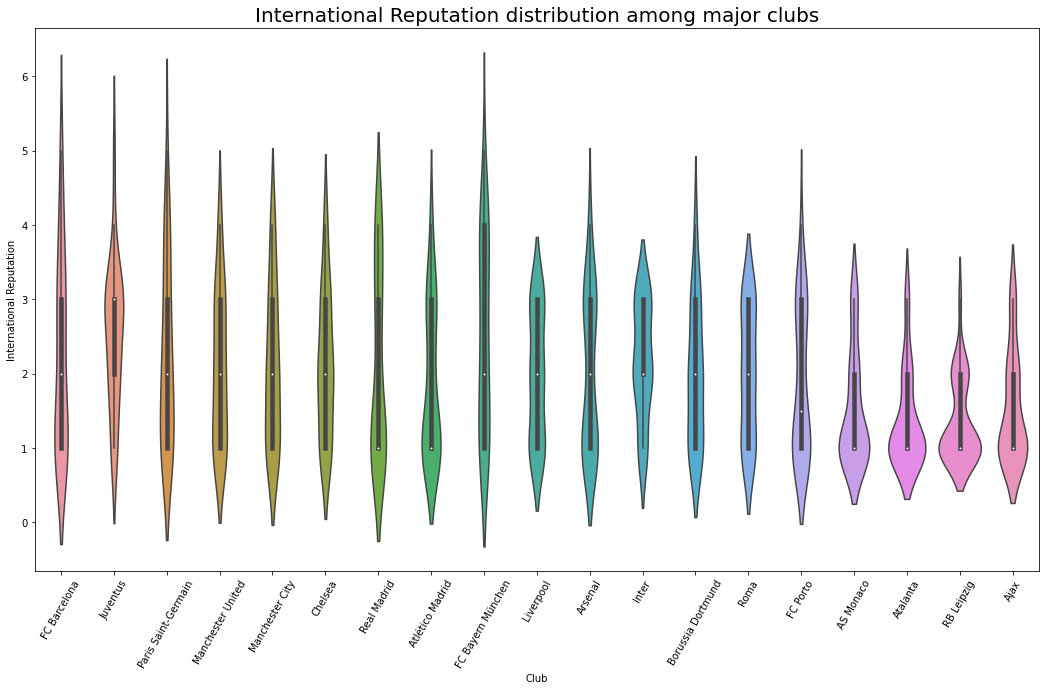

In [41]:
clubs_player_rep = fifa_dataset[['Club','International Reputation']]
clubs_player_rep = clubs_player_rep[clubs_player_rep['Club'].isin(clubs)]
plt.figure(figsize= (18,10))
sns.violinplot('Club', 'International Reputation', data = clubs_player_rep)
plt.xticks(rotation = 60)
plt.title('International Reputation distribution among major clubs', fontsize = 20)
plt.show()

### 40. SQUAD OF BEST PLAYERS AT EACH POSTION

In [42]:
best_player_per_position = fifa_dataset.iloc[fifa_dataset.groupby(fifa_dataset['Position'])['Overall'].idxmax()][['Name', 'Age', 'Club', 'Position']].reset_index()
best_player_per_position = best_player_per_position.drop('index', axis = 1)
best_player_per_position
#best player by position on Fifa 19

,Name,Age,Club,Position
0,A. Griezmann,27,Atlético Madrid,CAM
1,D. Godín,32,Atlético Madrid,CB
2,Sergio Busquets,29,FC Barcelona,CDM
3,Luis Alberto,25,Lazio,CF
4,Thiago,27,FC Bayern München,CM
5,De Gea,27,Manchester United,GK
6,J. Rodríguez,26,FC Bayern München,LAM
7,Marcelo,30,Real Madrid,LB
8,G. Chiellini,33,Juventus,LCB
9,T. Kroos,28,Real Madrid,LCM


### 41. SQUAD OF BEST TEENAGERS BY POTENTIAL RATING IN EVERY POSITION

In [43]:
teenagers = fifa_dataset[fifa_dataset['Age'] < 20].reset_index()
best_potential_teen_player_per_position = teenagers.iloc[teenagers.groupby(teenagers['Position'])['Potential'].idxmax()][['Name', 'Age', 'Club', 'Position', 'Value', 'Potential']].reset_index()
best_potential_teen_player_per_position = best_potential_teen_player_per_position.drop('index', axis = 1)
best_potential_teen_player_per_position
#best potential teen player by position on fifa 19

,Name,Age,Club,Position,Value,Potential
0,K. Havertz,19,Bayer 04 Leverkusen,CAM,22000000.0,89
1,B. Kamara,18,Olympique de Marseille,CB,6000000.0,88
2,S. Tonali,18,Brescia,CDM,1800000.0,89
3,A. Sigurðsson,19,PFC CSKA Moscow,CF,975000.0,81
4,Riqui Puig,18,FC Barcelona,CM,2100000.0,89
5,G. Donnarumma,19,Milan,GK,29000000.0,93
6,A. Hakimi,19,Borussia Dortmund,LB,12500000.0,86
7,D. Upamecano,19,RB Leipzig,LCB,13000000.0,88
8,M. Mount,19,Derby County,LCM,11000000.0,86
9,A. Maier,19,Hertha BSC,LDM,7500000.0,86


### 42. POTENTIAL RATING DISTRIBUTION AMONG TOP FOOTBALL NATIONS

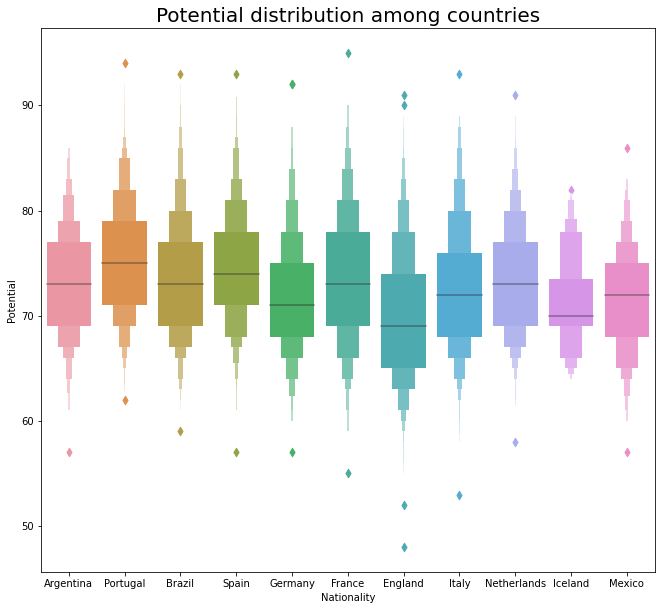

In [44]:
potential_by_country = fifa_dataset[['Nationality', 'Potential']]
potential_by_country = fifa_dataset[fifa_dataset['Nationality'].isin(countries)]
plt.figure(figsize = (11, 10))
sns.boxenplot('Nationality', 'Potential', data = potential_by_country)
plt.title('Potential distribution among countries', fontsize = 20)
plt.show()

### 43. TOP 10 PLAYERS WITH MOST YEARS AT THEIR CLUBS

In [45]:
import datetime
date_time = str(datetime.datetime.now())
date_time = int(date_time.strip().split(' ')[0].split('-')[0])
names_joined = fifa_dataset[['Name', 'Club', 'Joined']]
dates_joined = names_joined['Joined'].apply(lambda x: str(x).strip().split(',')[-1])
for i in range(len(dates_joined)):
    dates_joined[i] = date_time - float(dates_joined[i])
names_joined['Years at Club'] = dates_joined
years_at_club = names_joined[['Name', 'Club', 'Years at Club']].sort_values('Years at Club', ascending = False).head(10).reset_index()
years_at_club = years_at_club.drop('index', axis = 1)
years_at_club

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Club,Years at Club
0,O. Pérez,Pachuca,29
1,M. Al Shalhoub,Al Hilal,22
2,H. Sogahata,Kashima Antlers,22
3,M. Ogasawara,Kashima Antlers,22
4,S. Narazaki,Nagoya Grampus,21
5,M. Wölfli,BSC Young Boys,20
6,K. Kitamoto,Vissel Kobe,20
7,C. Källqvist,BK Häcken,19
8,Y. Endo,Gamba Osaka,19
9,S. Pellissier,Chievo Verona,18
